# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 8: Numerical Differentiation

## First Order Finite Difference Approximations

### Forward differences

Assume that we want to approximate the derivative of a function $f'(x_0)$ at a point $x=x_0$.

From the definition of the derivative we know that

$$
f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}
$$

Therefore, for $h$ very small we have that

$$
f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h}
$$

This difference quotient is known as the forward finite difference approximation of the derivative



#### Example

Consider for example the function $f(x)=x\sin(x)$ and assume that we want to find the derivative $f'(\pi/2)$.

We know that $f'(x)=\sin(x)+x\cos(x)$ and thus $f'(\pi/2)=1$. 

Using the finite different approximation that we have derived with $x_1=\pi/2+0.01$ and $x_0=\pi/2$ we get:

In [1]:
import numpy as np

In [2]:
def f(x):
    y = x*np.sin(x)
    return y

x0 = np.pi/2

h = 0.01

derivative = ( f(x0+h) - f(x0) ) / h
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 0.992096084232319 Error = 0.007903915767681013


Observe that the approximation is quite good, and if we take the value of `x1` closer to `x0` the result is getting better

### Backward differences

Similarly, we write

$$
\begin{aligned}
f'(x_0)&=\lim_{h\to 0}\frac{f(x0+h)-f(x_0)}{h}\\
&=\lim_{h\to 0}\frac{f(x_0)-f(x_0-h)}{h}
\end{aligned}
$$

So taking $h$ very small ($h\ll 1$) we can see that
$$
f'(x_0)\approx \frac{f(x_0)-f(x_0-h)}{h}
$$

This approximation is called backward finite difference approximation

Similarely, we can compute the previous derivative again using the simple code:

In [3]:
x0 = np.pi/2
h = 0.01

derivative = ( f(x0) - f(x0-h) ) / h
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 1.0078039166010244 Error = 0.007803916601024419


## Second Order Accurate Finite Difference Approximations

Consider now the following formulas for the derivative:

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}$$

and

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0)-f(x_0-h)}{h}$$

Adding these two formulas we get

$$2 f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0-h)}{h}$$

and dividing by 2:

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0-h)}{2h}$$

So taking small $h\ll 1$ we get the central finite difference approximation:


$$f'(x_0)\approx \frac{f(x_0+h)-f(x_0-h)}{2h}$$

And here is what we get in our case with $f(x)=x\sin(x)$ and $x_0=\pi/2$:

In [4]:
x0 = np.pi/2.0
h = 0.01

derivative = (f(x0+h) - f(x0-h))/(2.0*h)
print('df(x)=',derivative, 'Error=',np.abs(derivative-1.0))

df(x)= 0.9999500004166717 Error= 4.999958332829735e-05


**Remark:** Observe that for $h=0.01$ the forward and backward differences give the derivative with 2 correct decimal digits, while the central difference approximation gives the derivative with 4 correct decimal digits. The reason for that is that the central difference approximation has convergence rate 2 while for the other approximations is 1.

## Second-order derivatives

Assume now that we want to approximate the second derivative $f''(x_0)$.

In order to derive a formula for this derivative we again take the following Taylor polynomials:

$$f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2!}f''(x_0)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(c_1)$$

and

$$f(x_0-h)=f(x_0)-hf'(x_0)+\frac{h^2}{2!}f''(x_0)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(c_2)$$

But since we want to find the second derivative we need to add them so as to cancel the first and third-order derivatives:

$$f(x_0+h)+f(x_0-h)=2f(x_0)+h^2f''(x_0)+\frac{h^4}{24}(f^{(4)}(c_1)+f^{(4)}(c_2))$$

Solving for $f''(x_0)$ we have

$$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}-\frac{h^2}{24}(f^{(4)}(c_1)+f^{(4)}(c_2))$$

or better

$$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}+\mathcal{O}(h^2)$$

which is 2nd order accurate.

#### Example

Consider again the function $f(x)=x\sin(x)$ and $x_0=\pi/2$.

Now $f''(x)=2\cos(x)-x\sin(x)$ and thus $f''(\pi/2)=-\pi/2$

In [5]:
x0 = np.pi/2
h = 0.01

derivative2 = (f(x0+h) - 2.0*f(x0) + f(x0-h))/(h**2)
print('d2f(x) =',derivative2, 'Error =',np.abs(derivative2-(-np.pi/2)))

d2f(x) = -1.5707832368705432 Error = 1.3089924353337778e-05


## Richardson's Extrapolation

Assume we want to compute a quantity $D$ that can be approximated by $d(h)$ with an error $E(h)$:

$$D=d(h)+E(h)$$

For example if $D=f'(x_0)$ and $d(h)=(f(x_0+h)-f(x_0))/h$ then $E(h)=ch$.

Assume that $E(h)=c h^p$ for some power $p$. Although $c$ will be different for different $h$ assume that $c$ is the same.

Richardson extrapolation is a computation to eliminate the error and compute the actual quantity with better accuracy. This can be done by considering two different values of the parameter $h_1$ and $h_2$. 

Then we have:

$$D = d(h_1)+ch_1^p$$

and 

$$D = d(h_2)+c h_2^p$$

Eliminating the constant $c$ we obtain a new formula for the quantity $D$:

$$D=\frac{(h_1/h_2)^pd(h_2)-d(h_1)}{(h_1/h_2)^p-1}$$

and if we take for simplicity $h_2=h_1/2$ we obtain:

$$D=\frac{2^p d(h_1/2)-d(h_1)}{2^p-1}$$

In the case of the forward differences we will have:

In [6]:
x0 = np.pi/2
h = 0.01

d1 = (f(x0+h) - f(x0))/h
d2 = (f(x0+h/2.0) - f(x0))/(h/2.0)

derivative = 2.0*d2-d1
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 1.000024950548184 Error = 2.4950548183966248e-05


We observe that the error became of $\mathcal{O}(h^2)$

while the new formula for the approximation of the derivative is:

$$
f'(x_0)\approx \frac{f(x_0+h)+f(x_0+h/2)-2f(x_0)}{h}
$$

## Applications to Ordinary Differential Equations

We will introduce the simplest method for the numerical integration of o.d.e.'s namely the Euler method. We will study also the convergence of the method.

## Euler Method

The Euler method is perhaps the simplest numerical method for the solution of initial value problems of first-order ordinary differential equations. Assume that we are looking for approximations to the solution $y(t)$ of the initial-value problem

$$\frac{d}{dt}y(t)=f(t,y(t)),\quad a\leq t\leq b,\quad y(a)=y_0$$

The function $y(t)$ is a differentiable function, obviously, since the differential equation involves its first derivative. 

Given a uniform stepsize 
$$h=\frac{b-a}{N}=t_{i+1}-t_i$$
we consider the uniform grid
$$a=t_0<t_1<\cdots<t_N=b$$

Then Euler's method computes approximation $y_i\approx y(t_i)$ at the nodes $t_i$ via the explicit recursive formula

$$y_{i+1}=y_i+h f(t_i,y_i)$$
with given $y_0$

This will give the approximate solution at the mesh points $y_0, y_1, \dots, y_N$ only but usually is enough since we can construct an approximation of the solution at any $t\in(a,b)$ using interpolation.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

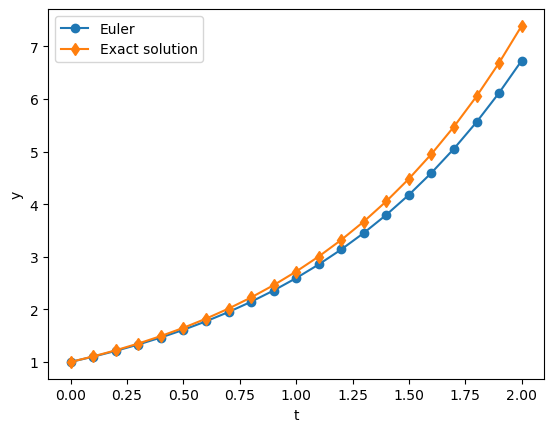

In [8]:
def f(t, y):
    return y

def euler(t, f, y0):
    n = len(t)
    y = np.zeros(n)
    h = t[1]-t[0]
    y[0]=y0
    for i in range(n-1):
        y[i+1] = y[i]+h*f(t[i], y[i])
    return y

a = 0.0; b = 2.0; N = 20
t = np.linspace(a, b, N+1)
y0 = 1.0
y = euler(t,f,y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Euler")
axes.plot(t, np.exp(t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

## The Improved Euler Method

We consider the general first-order o.d.e. system

$$y'(t)=f(t,y(t))$$

The improved Euler method is the following iteration

$$y_{i+1}=y_i+h\left(\frac{1}{2}k_1+\frac{1}{2}k_2 \right)$$

with intermediate stages:

$$
\begin{aligned}
k_1 &= f(t_i,y_i)\\
k_2 &= f(t_i+h,y_i+hk_1).
\end{aligned}
$$

This is also known as the **classical second-order Runge-Kutta method**. 


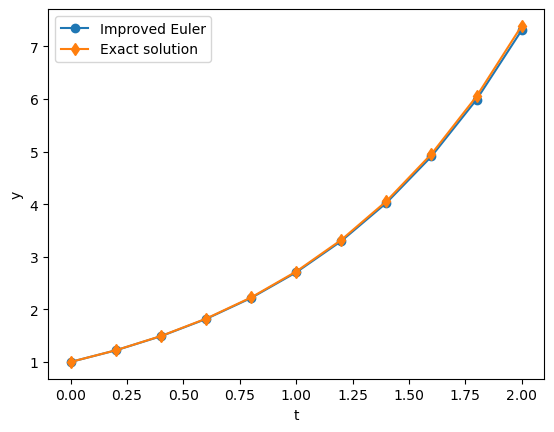

In [9]:
def f(t, y):
    return y

def improved_euler(t, f, y0):
    n = len(t)
    y = np.zeros(n)
    h = (t[-1]-t[0])/(n-1)
    y[0]=y0
    for i in range(n-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i+1], y[i] + h*k1)
        y[i+1] = y[i] + 0.5*h*(k1+k2)
    return y

a = 0.0; b = 2.0; N = 10
t = np.linspace(a, b, N+1)
y0 = 1.0
y = improved_euler(t, f, y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Improved Euler")
axes.plot(t, np.exp(t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

## The Notion of Stability

Let's see first a problematic situation. Consider the very simple ordinary differential equation 
$$y'(t)=\lambda y(t),\quad \lambda<0\ ,$$
with initial condition $y(0)=1$. The exact solution of this problem is the function $y(t)=e^{\lambda t}$. Let's try using our code, the case with $\lambda=-10$ and with $N=5$. In this case, the timestep $h=0.4$ which is large. 


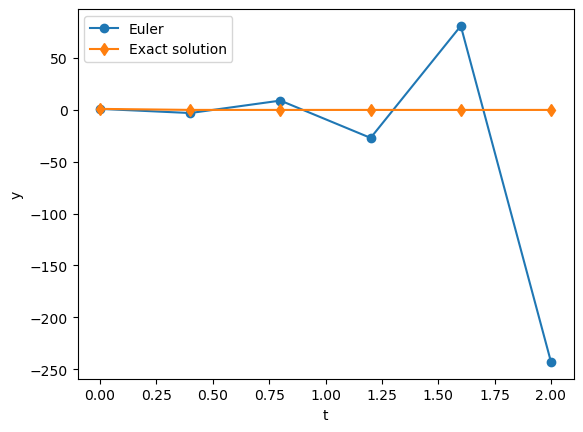

In [10]:
def f(t, y):
    return -10.0*y
a = 0.0; b = 2.0; N = 5
h = (b-a)/N
t = np.linspace(a, b, N+1)
y0 = 1.0
y = euler(t, f, y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Euler")
axes.plot(t, np.exp(-10*t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

To understand why this is happening, we apply Euler's method to the equation $y'(t)=\lambda y(t)$ for $\lambda<0$. This gives
$y_{n+1}=y_n+h\lambda y_n$, or even better 
$$y_{n+1}=(1+h\lambda)y_n,\quad n=0,1,2,\dots, \quad \mbox{ and }\quad y_0=1\ .$$
It can easily be seen that the previous recursive sequence can be expressed explicitly as
$$y_n=(1+h\lambda)^n, \quad n=0, 1,\dots\ .$$
So, we have that
$$
\begin{array}{ll}
 |y_n|\to 0, & \mbox{ if } |1+h\lambda|<1\ , \\
 |y_n|=1, & \mbox{ if } |1+h\lambda|=1\ , \\
 |y_n|\to \infty, & \mbox{ if } |1+h\lambda|>1\ . 
\end{array}
$$

Therefore, for stability we need $|1+h\lambda|<1$. Solving this inequality for $h\lambda$ yields $-2<h\lambda<2$. Since $h>0$ and $\lambda<0$, we need $h\lambda\in (-2,0)$ or else $h<-2/\lambda$ for stability. In our previous example where $\lambda=-10$ this means $h<0.2$ and this explains the unwanted behavior for $h=0.4>0.2$. 

## The Module `scipy.integrate`

Several functions for the numerical solution of general initial value problems of ordinary differential equations are available in `scipy.integrate` module of SciPy. Specifically, among the many solvers of the module `integrate` one can find the explicit Runge-Kutta-Fehlberg methods 23 and 45 implemented in the functions `RK23` and `RK45`, and the implicit Radau IIA method of order 5, implemented in the function `Radau`. In general, Radau methods with $s$ stages have order of convergence $2s-1$. All these methods can also be called via the function `solve_ivp` which we present next.

In order to demonstrate the usage of the function `solve_ivp` we consider again the initial value problem 
$$
\begin{aligned}
&y'(t)=y(t), \quad t\in (0,2]\ ,\\
&y(0)=1\ ,
\end{aligned}
$$
and we approximate its solution using the method RK45. For accurate results we consider the tolerance `rtol=1.e-6`.

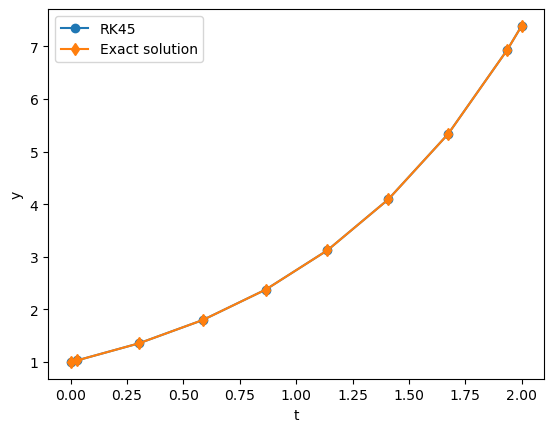

In [11]:
from scipy.integrate import solve_ivp

def f(t, y):
    return y

a = 0.0; b = 2.0
tspan = [a, b]
y0 = [1.0]

sol = solve_ivp(f, tspan, y0, 'RK45', rtol=1.e-6)

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol.t, sol.y[0], '-o', label="RK45")
axes.plot(sol.t, np.exp(sol.t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()


## Application in Epidemiology

We consider the $SIR$ model given by the differential equations
$$
\begin{aligned}
S'&=\frac{\beta}{N}SI\\
I'&=\frac{\beta}{N}SI-\gamma I\\
R'&=\gamma I
\end{aligned}
$$
with given initial conditions $S(0)$, $I(0)$ and $R(0)$

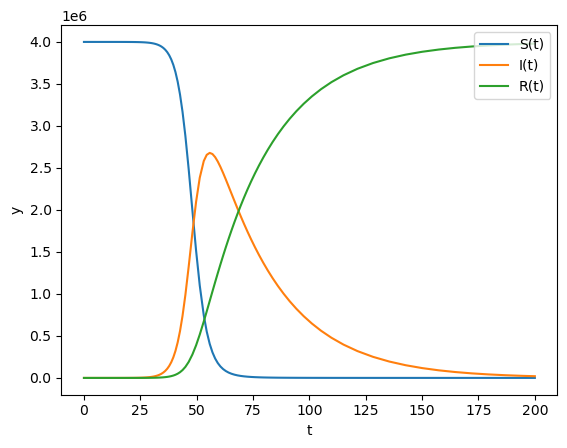

In [12]:
# Define the right-hand side and input parameters
def f(t, y, beta, gamma, N): 
    z = np.zeros(3)
    z[0]=-beta/N * y[0] * y[1]
    z[1]= beta/N * y[0] * y[1] - gamma * y[1]
    z[2]= gamma * y[1]
    return z
beta = 0.35; gamma = 0.035
N = 4.e+6; a = 0.0; b = 200.0; tspan = [a, b]
y0 = [N-1, 1, 0]
args1=(beta, gamma, N)
# Solve the ODE
sol1 = solve_ivp(f, tspan, y0, 'RK45', args=args1, rtol=1.e-6)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol1.t, sol1.y[0], label="S(t)")
axes.plot(sol1.t, sol1.y[1], label="I(t)")
axes.plot(sol1.t, sol1.y[2], label="R(t)")
axes.set_xlabel("t"); axes.set_ylabel("y"); axes.legend(loc=1); plt.show()